# Classifying Product Reviews by Sentiment

## Introduction

For my fourth module project for Flatiron School, I chose a natural language processing problem, trying to classify [product reviews](https://data.world/crowdflower/brands-and-product-emotions) as positive, negative, or neither. Key challenges when approaching this problem were the multi-class nature of the dataset and class imbalances––reviews without emotion were much more common than either positive or negative reviews. Because of class imbalances, I used F1 scores (rather than accuracy) to determine model success, and my best models achieved 0.53 F1 scores on test data.

## Imports

In [29]:
import numpy as np
import pandas as pd
import keras
import pickle
import sklearn
import analysis_util as util
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from keras import metrics, models, layers, optimizers
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

In [35]:
clfs = [LogisticRegressionCV(cv=5), 
        RandomForestClassifier(n_estimators=100), 
        SVC()]

In [31]:
with open("../data/X_train.txt", "rb") as fp:  
    X_train = pickle.load(fp)
    
with open("../data/X_train_val.txt", "rb") as fp:  
    X_train_val = pickle.load(fp)
    
with open("../data/smote_X_train.txt", "rb") as fp:  
    smote_X_train = pickle.load(fp)
    
with open("../data/X_test.txt", "rb") as fp:  
    X_test = pickle.load(fp)
    
with open("../data/y_train.txt", "rb") as fp:  
    y_train = pickle.load(fp)
    
with open("../data/smote_y_train.txt", "rb") as fp:  
    smote_y_train = pickle.load(fp)
    
with open("../data/y_train_val.txt", "rb") as fp:  
    y_train_val = pickle.load(fp)
    
with open("../data/y_test.txt", "rb") as fp:  
    y_test = pickle.load(fp)

## Model Selection and Training

I try out logistic regression, an SVM (with rbf kernel), a Random Forest, and a neural network.

In [36]:
for clf in clfs:
    clf.fit(X_train, y_train)
    print(f'{clf}')
    print('--Train--')
    util.report(y_train, clf.predict(X_train))
    print('--Validation--')
    util.report(y_train_val, clf.predict(X_train_val))

/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

LogisticRegressionCV(cv=5)
--Train--
[[58.1 35.2  6.7]
 [ 0.2 94.8  5. ]
 [ 0.  23.4 76.6]]

              precision    recall  f1-score   support

           0       0.97      0.58      0.73       389
           1       0.85      0.95      0.90      3767
           2       0.88      0.77      0.82      2100

    accuracy                           0.86      6256
   macro avg       0.90      0.76      0.81      6256
weighted avg       0.87      0.86      0.86      6256

--Validation--
[[ 9.4 75.3 15.3]
 [ 0.8 85.9 13.3]
 [ 0.2 49.6 50.2]]

              precision    recall  f1-score   support

           0       0.53      0.09      0.16        85
           1       0.70      0.86      0.77       797
           2       0.66      0.50      0.57       458

    accuracy                           0.69      1340
   macro avg       0.63      0.49      0.50      1340
weighted avg       0.68      0.69      0.66      1340

RandomForestClassifier()
--Train--
[[99.7  0.3  0. ]
 [ 0.  99.7  0.3]
 [ 

In [37]:
y_train_ohe = keras.utils.to_categorical(y_train, 3)
y_train_val_ohe = keras.utils.to_categorical(y_train_val, 3)
y_test_ohe = keras.utils.to_categorical(y_test, 3)

In [38]:
clf_ann = models.Sequential()
clf_ann.add(layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
clf_ann.add(layers.Dense(3, activation='softmax'))
clf_ann.compile(optimizer='SGD', 
                loss='categorical_crossentropy',
                metrics=[util.get_f1])
history = clf_ann.fit(X_train, y_train_ohe, epochs=10, batch_size=10, validation_data=(X_train_val, y_train_val_ohe))

Train on 6256 samples, validate on 1340 samples
Epoch 1/10
6256/6256 [==============================] - 7s 1ms/step - loss: 0.8896 - get_f1: 0.4768 - val_loss: 0.8522 - val_get_f1: 0.5948
Epoch 2/10
6256/6256 [==============================] - 6s 963us/step - loss: 0.8413 - get_f1: 0.6023 - val_loss: 0.8457 - val_get_f1: 0.5948
Epoch 3/10
6256/6256 [==============================] - 6s 937us/step - loss: 0.8365 - get_f1: 0.6019 - val_loss: 0.8430 - val_get_f1: 0.5948
Epoch 4/10
6256/6256 [==============================] - 6s 936us/step - loss: 0.8330 - get_f1: 0.6020 - val_loss: 0.8402 - val_get_f1: 0.5948
Epoch 5/10
6256/6256 [==============================] - 6s 939us/step - loss: 0.8289 - get_f1: 0.6021 - val_loss: 0.8371 - val_get_f1: 0.5948
Epoch 6/10
6256/6256 [==============================] - 6s 963us/step - loss: 0.8248 - get_f1: 0.6022 - val_loss: 0.8336 - val_get_f1: 0.5951
Epoch 7/10
6256/6256 [==============================] - 6s 973us/step - loss: 0.8200 - get_f1: 0.6027 

In [39]:
yhat_train = clf_ann.predict(X_train)
yhat_train = [np.argmax(y) for y in yhat_train]
util.report(y_train, yhat_train)

[[  0.   99.5   0.5]
 [  0.  100.    0. ]
 [  0.   98.7   1.3]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       389
           1       0.60      1.00      0.75      3767
           2       0.90      0.01      0.03      2100

    accuracy                           0.61      6256
   macro avg       0.50      0.34      0.26      6256
weighted avg       0.67      0.61      0.46      6256



/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
yhat_test = clf_ann.predict(X_train_val)
yhat_test = [np.argmax(y) for y in yhat_test]
util.report(y_train_val, yhat_test)

[[  0.  100.    0. ]
 [  0.  100.    0. ]
 [  0.   99.3   0.7]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.60      1.00      0.75       797
           2       1.00      0.01      0.01       458

    accuracy                           0.60      1340
   macro avg       0.53      0.34      0.25      1340
weighted avg       0.70      0.60      0.45      1340



Logistic regression did okay, the random forest did excellently on train data, and the SVM did pretty okay too. All models, however, are showing significant decreases in f1 score going from train to test data, a sign of overfitting especially in the case of the random forest. Also, looking at the confusion matrices, all models are showing a tendency to over-predict 1––no emotion––on test data, and the neural network is the worst offender of all, predicting almost exclusively 1's, with only a few 2's; it didn't predict a single 0.

## Visuals: ROCs

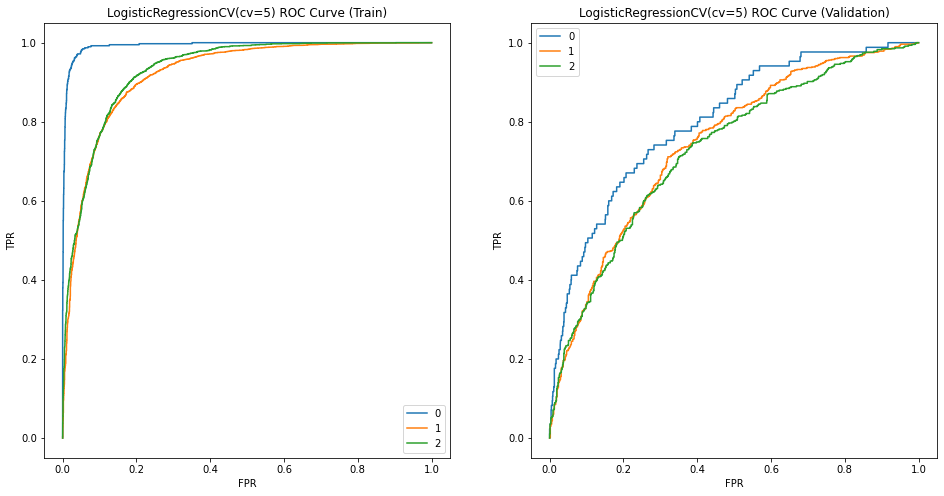

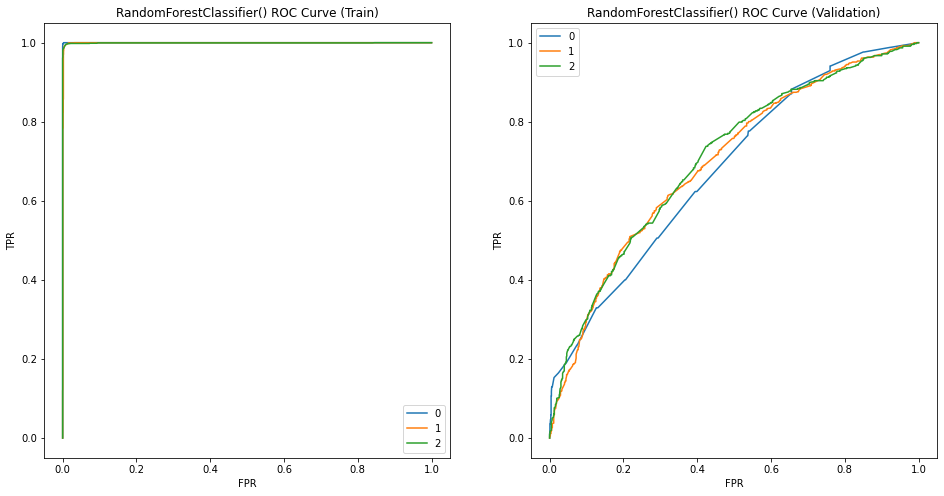

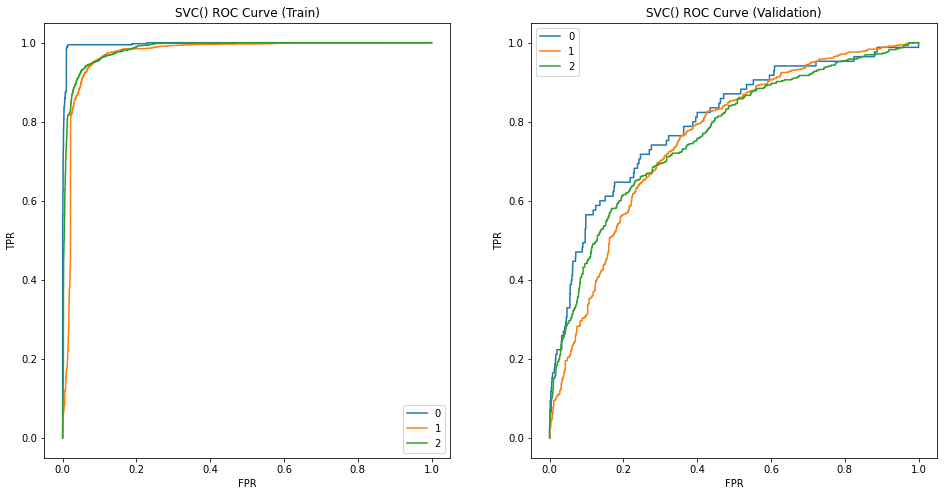

In [41]:
y_train_bin = label_binarize(y_train, classes=[0,1,2])
y_train_val_bin = label_binarize(y_train_val, classes=[0,1,2])
for clf in clfs:
    fig, axes = plt.subplots(1,2, figsize=(16,8))
    util.roc_curve_multiclass(clf, X_train, y_train_bin, axis=axes[0], title=f'{clf} ROC Curve (Train)')
    util.roc_curve_multiclass(clf, X_train_val, y_train_val_bin, axis=axes[1], title=f'{clf} ROC Curve (Validation)')

My models appear to be overfitting––model performance decreases on test data, and regardless of which model I use, I can't seem to beat ~0.53 F1 score on test data. The SVM and RF seem to perform best on train data, which might make them the best fit for this data.

## Fine Tuning

Onto improving those scores, and I'm mostly looking at the macro F1 score now, as it's best handling the class imbalance. 

In [43]:
params = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [5, 30]
}

clf_rf = RandomForestClassifier()
gs_rf = GridSearchCV(clf_rf, param_grid=params, scoring='f1_macro', cv=3, verbose=3)
gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] max_depth=10, min_samples_split=5, n_estimators=10 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, min_samples_split=5, n_estimators=10, score=0.361, total=   1.8s
[CV] max_depth=10, min_samples_split=5, n_estimators=10 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  max_depth=10, min_samples_split=5, n_estimators=10, score=0.336, total=   2.5s
[CV] max_depth=10, min_samples_split=5, n_estimators=10 ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


[CV]  max_depth=10, min_samples_split=5, n_estimators=10, score=0.350, total=   2.1s
[CV] max_depth=10, min_samples_split=5, n_estimators=50 ..............
[CV]  max_depth=10, min_samples_split=5, n_estimators=50, score=0.303, total=   7.4s
[CV] max_depth=10, min_samples_split=5, n_estimators=50 ..............
[CV]  max_depth=10, min_samples_split=5, n_estimators=50, score=0.304, total=   7.4s
[CV] max_depth=10, min_samples_split=5, n_estimators=50 ..............
[CV]  max_depth=10, min_samples_split=5, n_estimators=50, score=0.323, total=   7.3s
[CV] max_depth=10, min_samples_split=5, n_estimators=100 .............
[CV]  max_depth=10, min_samples_split=5, n_estimators=100, score=0.308, total=  15.5s
[CV] max_depth=10, min_samples_split=5, n_estimators=100 .............
[CV]  max_depth=10, min_samples_split=5, n_estimators=100, score=0.309, total=  14.6s
[CV] max_depth=10, min_samples_split=5, n_estimators=100 .............
[CV]  max_depth=10, min_samples_split=5, n_estimators=100, sco

[CV]  max_depth=50, min_samples_split=5, n_estimators=100, score=0.412, total=  21.7s
[CV] max_depth=50, min_samples_split=5, n_estimators=100 .............
[CV]  max_depth=50, min_samples_split=5, n_estimators=100, score=0.449, total=  21.6s
[CV] max_depth=50, min_samples_split=5, n_estimators=150 .............
[CV]  max_depth=50, min_samples_split=5, n_estimators=150, score=0.423, total=  32.9s
[CV] max_depth=50, min_samples_split=5, n_estimators=150 .............
[CV]  max_depth=50, min_samples_split=5, n_estimators=150, score=0.406, total=  32.7s
[CV] max_depth=50, min_samples_split=5, n_estimators=150 .............
[CV]  max_depth=50, min_samples_split=5, n_estimators=150, score=0.444, total=  32.1s
[CV] max_depth=50, min_samples_split=30, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=30, n_estimators=10, score=0.378, total=   2.1s
[CV] max_depth=50, min_samples_split=30, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=30, n_estimators=10,

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed: 77.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 50, None],
                         'min_samples_split': [5, 30],
                         'n_estimators': [10, 50, 100, 150]},
             scoring='f1_macro', verbose=3)

In [44]:
gs_rf.best_score_

0.44033023577499536

In [45]:
gs_rf.best_params_

{'max_depth': 50, 'min_samples_split': 5, 'n_estimators': 50}

In [50]:
util.report(y_train, gs_rf.predict(X_train))

[[98.5  1.5  0. ]
 [ 0.  99.8  0.2]
 [ 0.   1.5 98.5]]

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       389
           1       0.99      1.00      0.99      3767
           2       1.00      0.98      0.99      2100

    accuracy                           0.99      6256
   macro avg       1.00      0.99      0.99      6256
weighted avg       0.99      0.99      0.99      6256



In [48]:
util.report(y_train_val, gs_rf.predict(X_train_val))

[[10.6 87.1  2.4]
 [ 0.5 91.7  7.8]
 [ 0.2 76.4 23.4]]

              precision    recall  f1-score   support

           0       0.64      0.11      0.18        85
           1       0.63      0.92      0.75       797
           2       0.63      0.23      0.34       458

    accuracy                           0.63      1340
   macro avg       0.63      0.42      0.42      1340
weighted avg       0.63      0.63      0.57      1340



**Disappointingly, the f1 score on test data––0.45––hasn't improved after the GridSearch on the RF's hyperparameters.**

In [51]:
params = {
    'Cs': [1, 3, 5, 7, 10, 15, 20],
}

clf_lr = LogisticRegressionCV(cv=5)
gs_lr = GridSearchCV(clf_lr, param_grid=params, scoring='f1_macro', cv=3, verbose=3)
gs_lr.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] Cs=1 ............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................ Cs=1, score=0.251, total=   3.1s
[CV] Cs=1 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV] ................................ Cs=1, score=0.251, total=   2.6s
[CV] Cs=1 ............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s


[CV] ................................ Cs=1, score=0.250, total=   3.6s
[CV] Cs=3 ............................................................


/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

[CV] ................................ Cs=3, score=0.451, total=  30.4s
[CV] Cs=3 ............................................................


/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

[CV] ................................ Cs=3, score=0.471, total=  32.2s
[CV] Cs=3 ............................................................


/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

[CV] ................................ Cs=3, score=0.472, total=  30.7s
[CV] Cs=5 ............................................................


/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

[CV] ................................ Cs=5, score=0.451, total=  48.6s
[CV] Cs=5 ............................................................


/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

[CV] ................................ Cs=5, score=0.471, total=  48.4s
[CV] Cs=5 ............................................................


/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

[CV] ................................ Cs=5, score=0.472, total=  46.9s
[CV] Cs=7 ............................................................


/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

[CV] ................................ Cs=7, score=0.451, total= 1.0min
[CV] Cs=7 ............................................................


/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

[CV] ................................ Cs=7, score=0.471, total=  59.7s
[CV] Cs=7 ............................................................


/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

[CV] ................................ Cs=7, score=0.472, total= 1.3min
[CV] Cs=10 ...........................................................


/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

[CV] ............................... Cs=10, score=0.521, total= 1.6min
[CV] Cs=10 ...........................................................


/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

[CV] ............................... Cs=10, score=0.530, total= 1.2min
[CV] Cs=10 ...........................................................


/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

[CV] ............................... Cs=10, score=0.505, total= 1.6min
[CV] Cs=15 ...........................................................


/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

[CV] ............................... Cs=15, score=0.529, total= 2.1min
[CV] Cs=15 ...........................................................


/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

[CV] ............................... Cs=15, score=0.541, total= 2.9min
[CV] Cs=15 ...........................................................


/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

[CV] ............................... Cs=15, score=0.532, total= 2.4min
[CV] Cs=20 ...........................................................


/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

[CV] ............................... Cs=20, score=0.537, total= 3.4min
[CV] Cs=20 ...........................................................


/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

[CV] ............................... Cs=20, score=0.496, total= 2.8min
[CV] Cs=20 ...........................................................


/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

[CV] ............................... Cs=20, score=0.487, total= 4.0min


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed: 29.4min finished
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also ref

GridSearchCV(cv=3, estimator=LogisticRegressionCV(cv=5),
             param_grid={'Cs': [1, 3, 5, 7, 10, 15, 20]}, scoring='f1_macro',
             verbose=3)

In [52]:
gs_lr.best_params_

{'Cs': 15}

In [53]:
util.report(y_train, gs_lr.predict(X_train))

[[14.9 67.9 17.2]
 [ 0.  94.9  5.1]
 [ 0.  34.1 65.9]]

              precision    recall  f1-score   support

           0       1.00      0.15      0.26       389
           1       0.78      0.95      0.86      3767
           2       0.84      0.66      0.74      2100

    accuracy                           0.80      6256
   macro avg       0.88      0.59      0.62      6256
weighted avg       0.82      0.80      0.78      6256



In [54]:
util.report(y_train_val, gs_lr.predict(X_train_val))

[[ 2.4 83.5 14.1]
 [ 0.6 88.3 11. ]
 [ 0.  57.  43. ]]

              precision    recall  f1-score   support

           0       0.29      0.02      0.04        85
           1       0.68      0.88      0.77       797
           2       0.66      0.43      0.52       458

    accuracy                           0.67      1340
   macro avg       0.54      0.45      0.44      1340
weighted avg       0.65      0.67      0.64      1340



**Logistic has decreased slightly to 0.49 F1 score, but looking at the confusion matrix, it's getting most of the 0-class and 2-class items wrong.** That's a pretty big error, as those are the negative and positive reviews, respectively. There is a slightly mitigating factor that they're both being mostly misclassified as 1, no emotion, but still the majority of 0-class and 2-class reviews are wrongly labeled as no sentiment.

In [55]:
clf_ann_2 = models.Sequential()
clf_ann_2.add(layers.Dropout(.3, input_shape=(X_train.shape[1], )))
clf_ann_2.add(layers.Dense(1000, activation='relu'))
clf_ann_2.add(layers.Dropout(.3))
clf_ann_2.add(layers.Dense(500, activation='relu'))
clf_ann_2.add(layers.Dropout(.3))
clf_ann_2.add(layers.Dense(100, activation='relu'))
clf_ann_2.add(layers.Dropout(.3))
clf_ann_2.add(layers.Dense(3, activation='softmax'))
clf_ann_2.compile(optimizer='SGD', 
                loss='categorical_crossentropy',
                metrics=[util.get_f1])
history_2 = clf_ann_2.fit(X_train, y_train_ohe, epochs=20, batch_size=100, validation_data=(X_train_val, y_train_val_ohe))

Train on 6256 samples, validate on 1340 samples
Epoch 1/20
6256/6256 [==============================] - 7s 1ms/step - loss: 1.0180 - get_f1: 0.0000e+00 - val_loss: 0.9529 - val_get_f1: 0.0000e+00
Epoch 2/20
6256/6256 [==============================] - 5s 871us/step - loss: 0.9158 - get_f1: 0.2488 - val_loss: 0.8915 - val_get_f1: 0.6004
Epoch 3/20
6256/6256 [==============================] - 6s 882us/step - loss: 0.8751 - get_f1: 0.5875 - val_loss: 0.8681 - val_get_f1: 0.6004
Epoch 4/20
6256/6256 [==============================] - 5s 871us/step - loss: 0.8600 - get_f1: 0.5993 - val_loss: 0.8587 - val_get_f1: 0.6004
Epoch 5/20
6256/6256 [==============================] - 5s 869us/step - loss: 0.8534 - get_f1: 0.6014 - val_loss: 0.8541 - val_get_f1: 0.6004
Epoch 6/20
6256/6256 [==============================] - 5s 855us/step - loss: 0.8512 - get_f1: 0.6025 - val_loss: 0.8518 - val_get_f1: 0.6004
Epoch 7/20
6256/6256 [==============================] - 5s 855us/step - loss: 0.8482 - get_f1:

In [56]:
yhat_train = clf_ann_2.predict(X_train)
yhat_train = [np.argmax(y) for y in yhat_train]
util.report(y_train, yhat_train)

[[  0. 100.   0.]
 [  0. 100.   0.]
 [  0. 100.   0.]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       389
           1       0.60      1.00      0.75      3767
           2       0.00      0.00      0.00      2100

    accuracy                           0.60      6256
   macro avg       0.20      0.33      0.25      6256
weighted avg       0.36      0.60      0.45      6256



/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
yhat_val = clf_ann_2.predict(X_train_val)
yhat_val = [np.argmax(y) for y in yhat_val]
util.report(y_train_val, yhat_val)

[[  0. 100.   0.]
 [  0. 100.   0.]
 [  0. 100.   0.]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.59      1.00      0.75       797
           2       0.00      0.00      0.00       458

    accuracy                           0.59      1340
   macro avg       0.20      0.33      0.25      1340
weighted avg       0.35      0.59      0.44      1340



Pretty awful. Look at the confusion matrix: the model is just guessing 1 for everything. F1 score is 0.25.

Same problem as before. It's at this point that the support column of the classification report above is catching my eye. There are 189 "0" labels, but 1612 "1" labels. The difference is nearly 1:10, so below I try implementing SMOTE to see if that improves things.

In [58]:
for clf in clfs:
    clf.fit(smote_X_train, smote_y_train)
    print(f'{clf}')
    print('--Train--')
    util.report(smote_y_train, clf.predict(smote_X_train))
    print('--Validation--')
    util.report(y_train_val, clf.predict(X_train_val))

/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

LogisticRegressionCV(cv=5)
--Train--
[[99.9  0.   0.1]
 [ 0.8 93.4  5.8]
 [ 0.1  4.9 95. ]]

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3767
           1       0.95      0.93      0.94      3767
           2       0.94      0.95      0.95      3767

    accuracy                           0.96     11301
   macro avg       0.96      0.96      0.96     11301
weighted avg       0.96      0.96      0.96     11301

--Validation--
[[23.5 60.  16.5]
 [ 3.1 74.2 22.7]
 [ 4.8 40.4 54.8]]

              precision    recall  f1-score   support

           0       0.30      0.24      0.26        85
           1       0.71      0.74      0.73       797
           2       0.56      0.55      0.56       458

    accuracy                           0.64      1340
   macro avg       0.53      0.51      0.52      1340
weighted avg       0.64      0.64      0.64      1340

RandomForestClassifier()
--Train--
[[100.    0.    0. ]
 [  0.   99.4   0.

Big improvement. The F1 score is up to 0.31 from 0.25. Still not a great score, though. Next I try whittling down my model a bit.

In [60]:
smote_y_train_ohe = keras.utils.to_categorical(smote_y_train, 3)

In [63]:
clf_ann_3 = models.Sequential()
clf_ann_3.add(layers.Dropout(.3, input_shape=(X_train.shape[1], )))
clf_ann_3.add(layers.Dense(1000, activation='relu'))
clf_ann_3.add(layers.Dropout(.3))
clf_ann_3.add(layers.Dense(500, activation='relu'))
clf_ann_3.add(layers.Dropout(.3))
clf_ann_3.add(layers.Dense(100, activation='relu'))
clf_ann_3.add(layers.Dropout(.3))
clf_ann_3.add(layers.Dense(3, activation='softmax'))
clf_ann_3.compile(optimizer='SGD', 
                loss='binary_crossentropy',
                metrics=[util.get_f1])
history_3 = clf_ann_3.fit(smote_X_train, smote_y_train_ohe, 
                          epochs=50, 
                          batch_size=100, 
                          class_weight=class_weight,
                          validation_data=(X_train_val, y_train_val_ohe))

Train on 11301 samples, validate on 1340 samples
Epoch 1/50
11301/11301 [==============================] - 15s 1ms/step - loss: 3.0602 - get_f1: 0.2954 - val_loss: 1.3082 - val_get_f1: 0.0607
Epoch 2/50
11301/11301 [==============================] - 14s 1ms/step - loss: 2.8056 - get_f1: 0.3391 - val_loss: 1.3037 - val_get_f1: 0.0607
Epoch 3/50
11301/11301 [==============================] - 13s 1ms/step - loss: 2.7903 - get_f1: 0.3304 - val_loss: 1.1541 - val_get_f1: 0.0607
Epoch 4/50
11301/11301 [==============================] - 11s 951us/step - loss: 2.7627 - get_f1: 0.3304 - val_loss: 1.1650 - val_get_f1: 0.0607
Epoch 5/50
11301/11301 [==============================] - 10s 917us/step - loss: 2.7100 - get_f1: 0.3304 - val_loss: 1.1477 - val_get_f1: 0.0607
Epoch 6/50
11301/11301 [==============================] - 11s 939us/step - loss: 2.6388 - get_f1: 0.3392 - val_loss: 1.4789 - val_get_f1: 0.0607
Epoch 7/50
11301/11301 [==============================] - 11s 951us/step - loss: 2.5287

In [64]:
yhat_train = clf_ann_3.predict(X_train)
yhat_train = [np.argmax(y) for y in yhat_train]
util.report(y_train, yhat_train)

[[100.    0.    0. ]
 [  5.7   0.3  94. ]
 [  1.    0.   99. ]]

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       389
           1       1.00      0.00      0.01      3767
           2       0.37      0.99      0.54      2100

    accuracy                           0.40      6256
   macro avg       0.66      0.66      0.44      6256
weighted avg       0.77      0.40      0.23      6256



In [65]:
yhat_val = clf_ann_3.predict(X_train_val)
yhat_val = [np.argmax(y) for y in yhat_val]
util.report(y_train_val, yhat_val)

[[51.8  0.  48.2]
 [14.4  0.  85.6]
 [14.6  0.  85.4]]

              precision    recall  f1-score   support

           0       0.19      0.52      0.28        85
           1       0.00      0.00      0.00       797
           2       0.35      0.85      0.50       458

    accuracy                           0.32      1340
   macro avg       0.18      0.46      0.26      1340
weighted avg       0.13      0.32      0.19      1340



/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Adding some dropout layers to my ANN improved the f1 significantly, now at 0.53 on test data. Importantly, looking at the confusion matrix shows that for each class, it correctly predicts that class more than any other: 60% of 0's are accurately predicted, 49% of 1's are accurately predicted, and 72% of 2's are accurately predicted.

The biggest mistake the ANN is making now is classifying 42% of 1's as 2's. In other words, 42% of reviews with no emotion are being categorized as positive.

In [66]:
params = {
    'n_estimators': [80, 90, 100, 110],
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [5]
}

clf_rf = RandomForestClassifier()
gs_rf = GridSearchCV(clf_rf, param_grid=params, scoring='f1_macro', cv=3, verbose=3)
gs_rf.fit(smote_X_train, smote_y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] max_depth=None, min_samples_split=5, n_estimators=80 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, min_samples_split=5, n_estimators=80, score=0.796, total=  34.5s
[CV] max_depth=None, min_samples_split=5, n_estimators=80 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.6s remaining:    0.0s


[CV]  max_depth=None, min_samples_split=5, n_estimators=80, score=0.807, total=  34.2s
[CV] max_depth=None, min_samples_split=5, n_estimators=80 ............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV]  max_depth=None, min_samples_split=5, n_estimators=80, score=0.850, total=  37.6s
[CV] max_depth=None, min_samples_split=5, n_estimators=90 ............
[CV]  max_depth=None, min_samples_split=5, n_estimators=90, score=0.794, total=  45.8s
[CV] max_depth=None, min_samples_split=5, n_estimators=90 ............
[CV]  max_depth=None, min_samples_split=5, n_estimators=90, score=0.809, total=  44.2s
[CV] max_depth=None, min_samples_split=5, n_estimators=90 ............
[CV]  max_depth=None, min_samples_split=5, n_estimators=90, score=0.850, total=  40.3s
[CV] max_depth=None, min_samples_split=5, n_estimators=100 ...........
[CV]  max_depth=None, min_samples_split=5, n_estimators=100, score=0.796, total=  43.3s
[CV] max_depth=None, min_samples_split=5, n_estimators=100 ...........
[CV]  max_depth=None, min_samples_split=5, n_estimators=100, score=0.816, total=  42.2s
[CV] max_depth=None, min_samples_split=5, n_estimators=100 ...........
[CV]  max_depth=None, min_samples_split=5, n_estim

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 40.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 50],
                         'min_samples_split': [5],
                         'n_estimators': [80, 90, 100, 110]},
             scoring='f1_macro', verbose=3)

In [67]:
gs_rf.best_params_

{'max_depth': 50, 'min_samples_split': 5, 'n_estimators': 110}

In [69]:
yhat_train = gs_rf.predict(smote_X_train)
util.report(smote_y_train, yhat_train)

[[100.    0.    0. ]
 [  0.   99.5   0.4]
 [  0.    0.7  99.3]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3767
           1       0.99      1.00      0.99      3767
           2       1.00      0.99      0.99      3767

    accuracy                           1.00     11301
   macro avg       1.00      1.00      1.00     11301
weighted avg       1.00      1.00      1.00     11301



In [70]:
yhat_val = gs_rf.predict(X_train_val)
util.report(y_train_val, yhat_val)

[[12.9 56.5 30.6]
 [ 0.9 77.9 21.2]
 [ 0.9 59.  40.2]]

              precision    recall  f1-score   support

           0       0.50      0.13      0.21        85
           1       0.66      0.78      0.72       797
           2       0.49      0.40      0.44       458

    accuracy                           0.61      1340
   macro avg       0.55      0.44      0.45      1340
weighted avg       0.59      0.61      0.59      1340



Still not much improvement on the RF even using SMOTEd train data, but we can tell it does best corrrectly classifying negative reviews. I've got to throw in the hat on it for now. 

## Bigrams

In [74]:
with open('../data/bigram_X_train.txt', 'rb') as fp:
    bigram_X_train = pickle.load(fp)
    
with open('../data/bigram_X_train_val.txt', 'rb') as fp:
    bigram_X_train_val = pickle.load(fp)
    
with open('../data/bigram_X_test.txt', 'rb') as fp:
    bigram_X_test = pickle.load(fp)

In [75]:
for clf in clfs:
    clf.fit(bigram_X_train, y_train)
    print(f'{clf}')
    print('--Train--')
    util.report(y_train, clf.predict(bigram_X_train))
    print('--Validation--')
    util.report(y_train_val, clf.predict(bigram_X_train_val))

/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

LogisticRegressionCV(cv=5)
--Train--
[[63.5 30.8  5.7]
 [ 0.2 96.   3.8]
 [ 0.  18.4 81.6]]

              precision    recall  f1-score   support

           0       0.97      0.63      0.77       389
           1       0.88      0.96      0.92      3767
           2       0.91      0.82      0.86      2100

    accuracy                           0.89      6256
   macro avg       0.92      0.80      0.85      6256
weighted avg       0.89      0.89      0.89      6256

--Validation--
[[10.6 76.5 12.9]
 [ 0.8 85.1 14.2]
 [ 0.2 49.3 50.4]]

              precision    recall  f1-score   support

           0       0.56      0.11      0.18        85
           1       0.70      0.85      0.77       797
           2       0.65      0.50      0.57       458

    accuracy                           0.69      1340
   macro avg       0.64      0.49      0.50      1340
weighted avg       0.67      0.69      0.66      1340

RandomForestClassifier()
--Train--
[[99.5  0.5  0. ]
 [ 0.  99.8  0.2]
 [ 

## SMOTEd Bigrams

In [76]:
with open('../data/smote_bigram_X_train.txt', 'rb') as fp:
    smote_bigram_X_train = pickle.load(fp)
    
with open('../data/smote_bigram_y_train.txt', 'rb') as fp:
    smote_bigram_y_train = pickle.load(fp)

In [80]:
for clf in clfs:
    clf.fit(smote_bigram_X_train, smote_bigram_y_train)
    print(f'{clf}')
    print('--Train--')
    util.report(smote_bigram_y_train, clf.predict(smote_bigram_X_train))
    print('--Validation--')
    util.report(y_train_val, clf.predict(bigram_X_train_val))

/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

LogisticRegressionCV(cv=5)
--Train--
[[99.9  0.   0. ]
 [ 0.7 94.7  4.6]
 [ 0.   3.2 96.8]]

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3767
           1       0.97      0.95      0.96      3767
           2       0.95      0.97      0.96      3767

    accuracy                           0.97     11301
   macro avg       0.97      0.97      0.97     11301
weighted avg       0.97      0.97      0.97     11301

--Validation--
[[24.7 57.6 17.6]
 [ 3.5 74.  22.5]
 [ 3.1 40.  57. ]]

              precision    recall  f1-score   support

           0       0.33      0.25      0.28        85
           1       0.72      0.74      0.73       797
           2       0.57      0.57      0.57       458

    accuracy                           0.65      1340
   macro avg       0.54      0.52      0.53      1340
weighted avg       0.64      0.65      0.65      1340

RandomForestClassifier()
--Train--
[[100.    0.    0. ]
 [  0.   99.6   0.

## Results 

The neural network, random forest, and logistic regression models seems to be faring best. With more time, it might be a good idea to check out more forest models, like AdaBoost or XGBoost.

|Model|Initial F1|**Best F1**|
|---|---|---|
| Neural Network | 0.25 | 0.53 |
| Logistic Regressions | 0.53 | 0.53 |
| Random Forest | 0.49 | 0.51 |
| Support Vector Machine | 0.47 | 0.48 |
| Naive Bayes Classifier | 0.37 | 0.38 |
|  |  |  |

## Conclusions

The hardest part about this project has turned out to be the three-way classification problem as well as class imbalance, approximately 10:1 in the case of classes '1' and '0'. At present, the most informative component of this analysis seems to be the purely exploratory: dividing data into groups by sentiment (positive, negative, none) and inspecting most common tokens from there. That line of inquiry yielded some interesting insights, particularly when comparing between positive and negative reviews. For example, exclamation marks are one of the top 40 most common (filtered) tokens among positive reviews, as were "great," "social," and "new"; meanwhile, "need," "headaches," and "long" and "line" were in the top 40 most common for negative reviews.

As a "black box" model for discerning review sentiment, these models don't yet appear very impressive, with the very best models producing **~0.53 macro f1 score on test data**. Decent, but not terribly impressive. ROC curves revealed that across the board models were best at identifying negative reviews. F1 scores for this project were achieved by the following steps:

1. Preprocess data

 a. Lowercase all reviews
  
 b. Break reviews into individual tokens
  
 c. Remove all punctuation (except exclamation points) and stop words from tokens
  
 d. Lemmatize tokens
  
 e. Vectorize with tf-idf
  
 f. Reduce dimensions with TSVD
  
 g. Resample using SMOTE
  
  
2.  Train models. Caution: I trained my models without a validation set, so be aware of that when interpretting my results; I should have, but forgot. Best hyperparameters for each model were as follows:

 RF:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 90}
  
 LogRegCV: {'Cs': 10}
  
 SVM: out of the box
  
 Multinomial Naive Bayes:  out of the box
  
 ANN: 3 hidden layers of 1000, 500, and 100; all with ReLU activation, except softmax on the output layer; and 30% dropout at each layer.
